In [ ]:
# 원래 공간에서 선형 분류가 불가능한 경우에도, 커널을 사용하여 고차원 공간에서 선형 분류가 가능 (커널 트릭)
# 소프트 마진(Soft Margin)은 약간의 마진 위반을 허용하여 과적합을 방지하고, 이상치에 덜 민감하게 만든다.

# SVM은 플러스 마진과 마이너스 마진 사이를 극대화해준다.
# 플러스 마진과 마이너스 마진은 각각 +1, -1 마진 경계
# SVM은 서포트 벡터와 결정 경계 사이의 마진을 최대화하려고 한다.

# SVM은 이진 분류기지만, 2~3개의 SVM으로 다중분류 (OvR, OvO)가 가능하다.

In [ ]:
# Support Vector가 많을수록 모델의 복잡도가 높아지고 일반화 성능이 낮아진다.
# 커널 트릭 : 고차원 속성들을 직접 생성하지 않고 비선형 패턴을 분류
# 소프트 마진 판별기는 최대 마진 분류기의 분류 마진에 대한 조건을 완화시켜 선형 분리가 가능하지 않은 경우에도 적용이 가능

In [ ]:
# 장점

In [ ]:
# 단점

### Linear SVM 모델의 학습 산출물은 선형 판별함수로 대체할 수 있다.
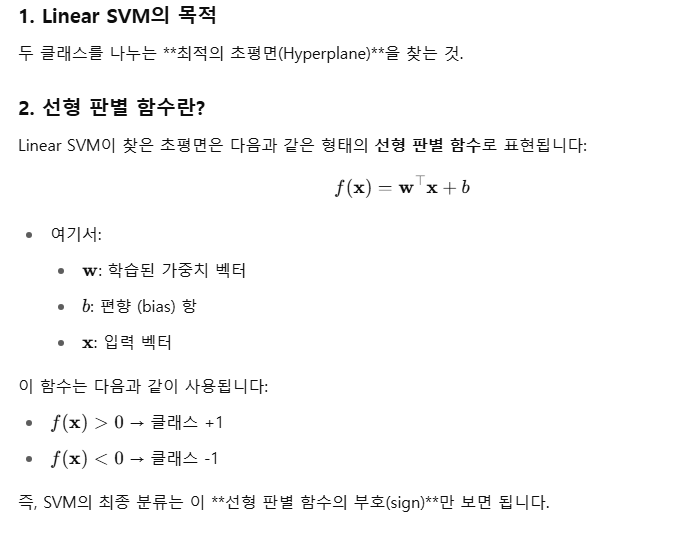

In [1]:
# SVM의 목적함수(=최적화 식)는 두 가지 요소를 균형 있게 최적화
# 1. 마진을 최대화하려는 항
# 2. 오분류(또는 마진 위반)를 최소화하려는 항

# C를 높이면 학습 데이터의 분리력이 높아짐 (최적합 상태 후, 과적합)

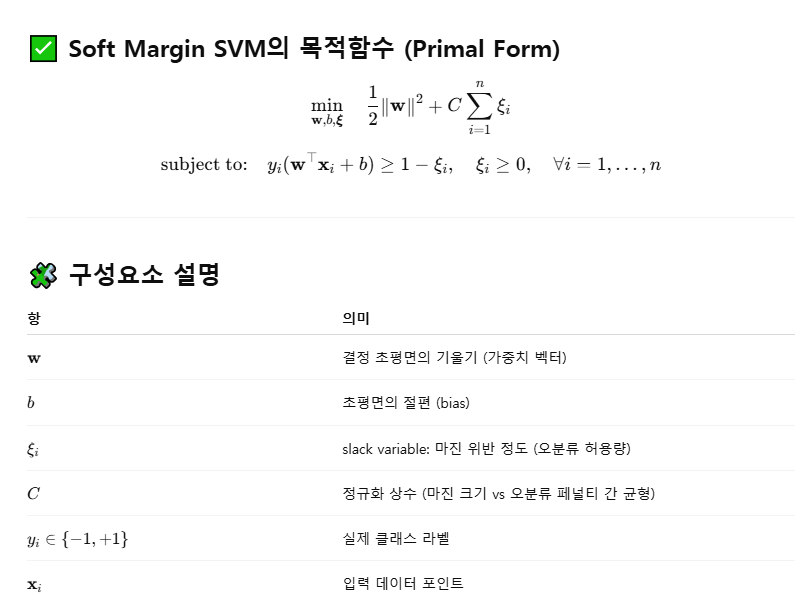
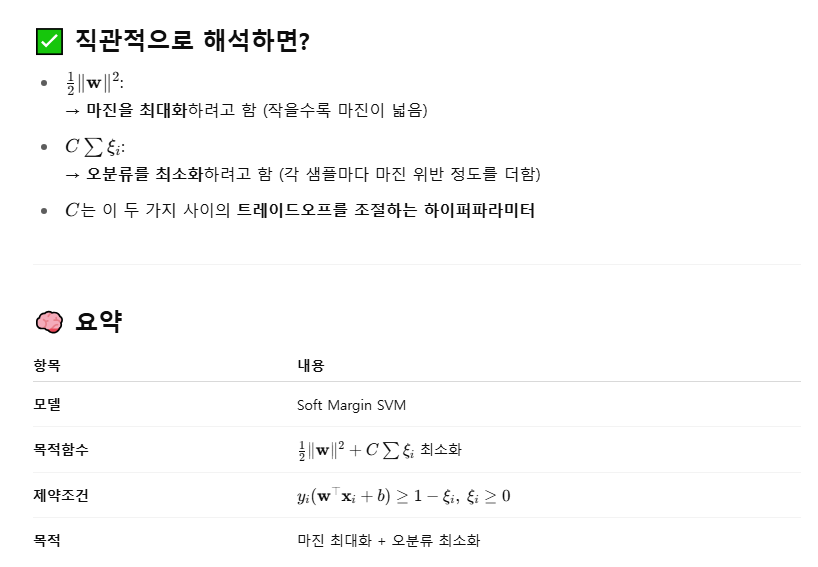

In [ ]:
# 슬랙 변수 𝜉𝑖 가 커지면 해당 데이터 포인트가 마진을 위반하거나 오분류되었다는 것을 의미
# 슬랙 변수가 클수록 그 포인트는 마진 바깥(혹은 잘못된 쪽)에 위치해 있다는 뜻
# 슬랙 변수 커짐 → 분류 마진 실질적으로 좁아짐 → 모델은 과적합을 피하려고 더 관대해짐

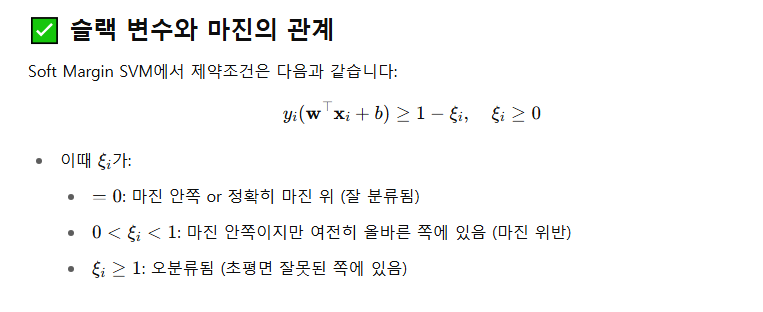

In [ ]:
# Soft Margin 분류기는 Langrange Dual을 적용할 수 있다.
# 0 <= α < C : 최대 마진 위의 지지 벡터(Support Vector)
# α = 0 : 최대 마진 바깥 쪽의 데이터 포인트
# α = C : 최대 마진 안 쪽의 지지 벡터


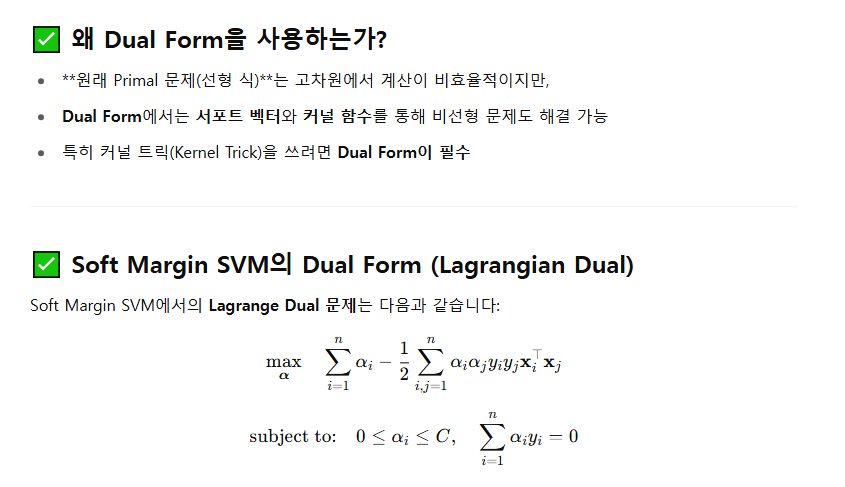

### SVM 분류기의 목적함수

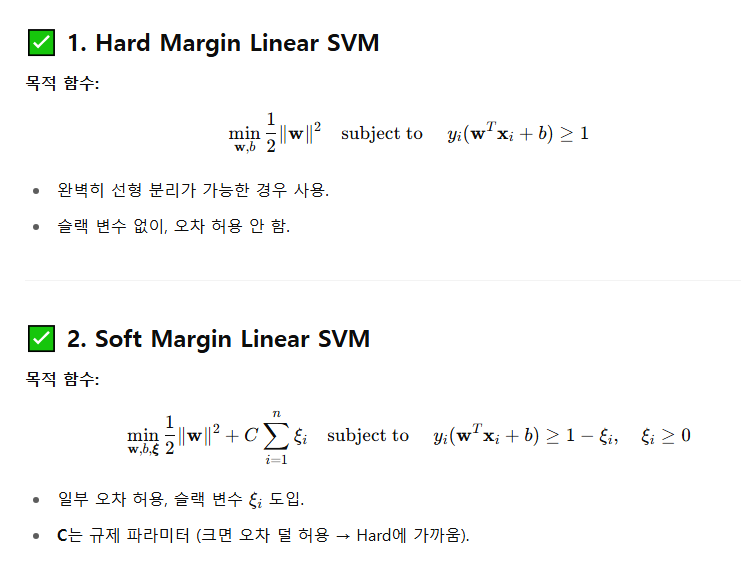
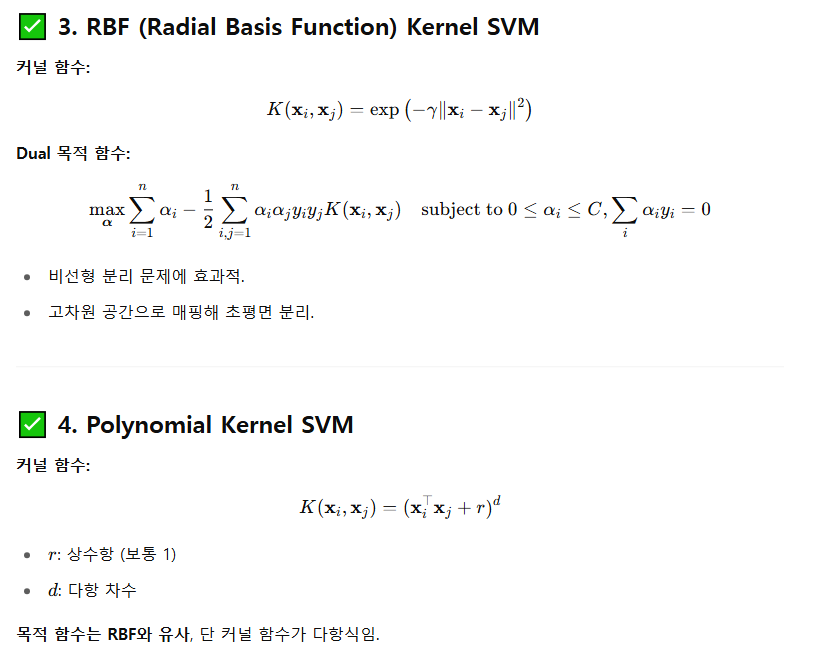

c:\users\vvv30\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


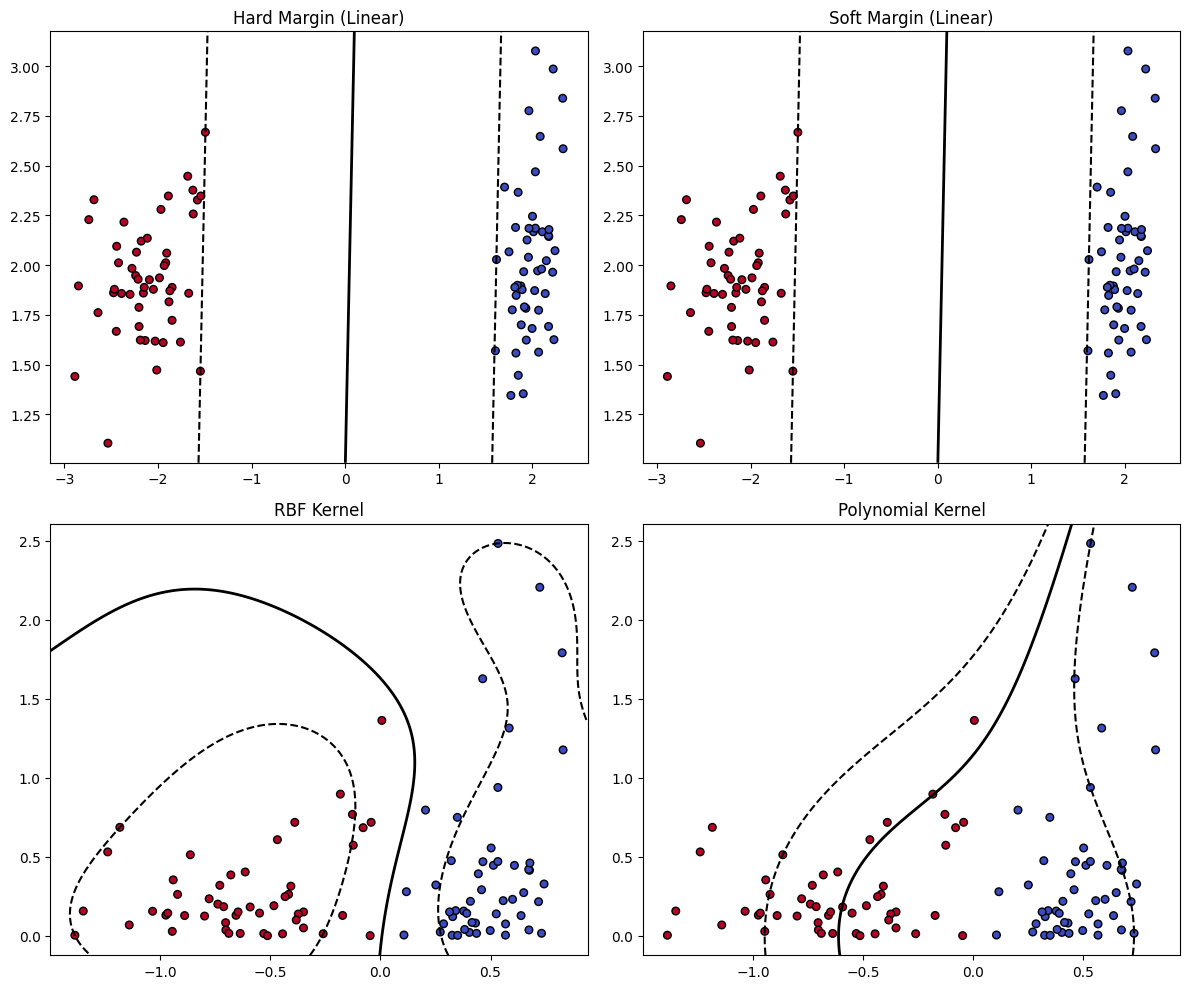

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# 데이터 생성 (2차원, 선형적으로 분리 가능)
X_lin, y_lin = make_classification(n_samples=100, n_features=2, 
                                   n_redundant=0, n_informative=2, 
                                   n_clusters_per_class=1, class_sep=2.0, random_state=1)

# 데이터 생성 (선형적으로 분리 불가능, 비선형 경계 필요)
X_rbf, y_rbf = make_classification(n_samples=100, n_features=2, 
                                   n_redundant=0, n_informative=2, 
                                   n_clusters_per_class=1, class_sep=0.5, random_state=1)
# 원형 분포로 왜곡 (RBF에서 효과적)
X_rbf[:, 1] = X_rbf[:, 1] ** 2

# SVM 모델 정의
models = {
    "Hard Margin (Linear)": svm.SVC(kernel='linear', C=1e10),  # 매우 큰 C => hard margin
    "Soft Margin (Linear)": svm.SVC(kernel='linear', C=1.0),    # 일반적인 soft margin
    "RBF Kernel": svm.SVC(kernel='rbf', gamma='scale', C=1.0),
    "Polynomial Kernel": svm.SVC(kernel='poly', degree=3, C=1.0)
}

# 데이터셋에 따른 모델 학습
datasets = {
    "Hard Margin (Linear)": (X_lin, y_lin),
    "Soft Margin (Linear)": (X_lin, y_lin),
    "RBF Kernel": (X_rbf, y_rbf),
    "Polynomial Kernel": (X_rbf, y_rbf)
}

# 그림 그리기 함수 정의
def plot_svm_decision_boundary(model, X, y, ax, title):
    model.fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_title(title)
    
    # 결정경계 그리기
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, 500), np.linspace(*ylim, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    ax.contour(xx, yy, Z, levels=[-1, 1], linestyles=['--', '--'], colors='black')

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, (key, model) in zip(axes.ravel(), models.items()):
    X, y = datasets[key]
    plot_svm_decision_boundary(model, X, y, ax, key)

plt.tight_layout()
plt.show()